In [33]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [34]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

numpy.random.seed(7)

dataframe = read_csv('airline-passengers.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [35]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1], 1))

batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
for i in range(1000):
	model.fit(trainX, trainY, epochs=10, batch_size=batch_size, verbose=2, shuffle=False)
	model.reset_states()
	


Epoch 1/10
92/92 - 1s - loss: 0.0121 - 1s/epoch - 16ms/step
Epoch 2/10
92/92 - 0s - loss: 0.0300 - 133ms/epoch - 1ms/step
Epoch 3/10
92/92 - 0s - loss: 0.0169 - 130ms/epoch - 1ms/step
Epoch 4/10
92/92 - 0s - loss: 0.0140 - 131ms/epoch - 1ms/step
Epoch 5/10
92/92 - 0s - loss: 0.0118 - 133ms/epoch - 1ms/step
Epoch 6/10
92/92 - 0s - loss: 0.0101 - 141ms/epoch - 2ms/step
Epoch 7/10
92/92 - 0s - loss: 0.0088 - 132ms/epoch - 1ms/step
Epoch 8/10
92/92 - 0s - loss: 0.0078 - 127ms/epoch - 1ms/step
Epoch 9/10
92/92 - 0s - loss: 0.0071 - 129ms/epoch - 1ms/step
Epoch 10/10
92/92 - 0s - loss: 0.0067 - 128ms/epoch - 1ms/step
Epoch 1/10
92/92 - 0s - loss: 0.0054 - 129ms/epoch - 1ms/step
Epoch 2/10
92/92 - 0s - loss: 0.0061 - 132ms/epoch - 1ms/step
Epoch 3/10
92/92 - 0s - loss: 0.0059 - 132ms/epoch - 1ms/step
Epoch 4/10
92/92 - 0s - loss: 0.0058 - 133ms/epoch - 1ms/step
Epoch 5/10
92/92 - 0s - loss: 0.0056 - 130ms/epoch - 1ms/step
Epoch 6/10
92/92 - 0s - loss: 0.0055 - 128ms/epoch - 1ms/step
Epoch 7/1

44/44 [==============================] - 0s 956us/step
Train Score: 17.99 RMSE
Test Score: 114.90 RMSE


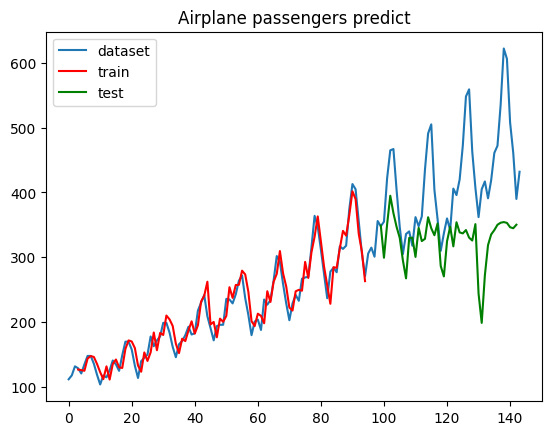

In [36]:
trainPredict = model.predict(trainX, batch_size=batch_size)
model.reset_states()
testPredict = model.predict(testX, batch_size=batch_size)

trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))


trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

plt.plot(scaler.inverse_transform(dataset), label='dataset')
plt.plot(trainPredictPlot, color='red', label='train')
plt.plot(testPredictPlot, color='green', label='test')
plt.legend(loc='best')
plt.title('Airplane passengers predict')
plt.show()

### 1 попытка. default  
Train Score: 25.53 RMSE
Test Score: 53.72 RMSE
### 2 попытка. цикл на 1000 
Train Score: 20.58 RMSE
Test Score: 47.29 RMSE
### 3 попытка : Dropout 0.25
Train Score: 20.88 RMSE
Test Score: 58.39 RMSE
### 4 попытка. Nadam
Train Score: 20.41 RMSE
Test Score: 55.33 RMSE
### 5 попытка. LSTM(5 ны выход )  look_back=1, без Dropout 0.25
Train Score: 19.24 RMSE
Test Score: 54.06 RMSE
### 6 попытка. 25 эпох 100 циклов LSTM(5 ны выход )  look_back=1, без Dropout 0.25
Train Score: 31.50 RMSE
Test Score: 206.68 RMSE


## Предложите свои варианты решения проблемы исчезающего градиента в RNN
 Эта проблема решается с помощью архитектуры нейронной сети с долговременной кратковременной памятью.(LSTM)
 Она делает RNN полее практичными для долгосрочных задач. Состояния врат забывания в LSTM прибавляются ко вхоуд а не умножаються или смешиваются через веса как в RNN.
